<a href="https://colab.research.google.com/github/pavi-ninjaac/Specrom_Analysis/blob/main/Internship_works/week1/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import os
import time
import json

#from visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install fasttext

In [ ]:
import fasttext

In [ ]:
"""from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive"""

"from google.colab import drive\ndrive.mount('/gdrive')\n%cd /gdrive"

In [ ]:
# load the data files
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataFiles/111778997-2020-12-23.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataFiles/395563332-2020-12-24.csv')
print("The size of the dataset 1---->",df1.shape)
print("The size of the dataset 2---->",df2.shape)

The size of the dataset 1----> (49350, 13)
The size of the dataset 2----> (138448, 13)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#add those to dataframe into one using the pandas append method
data = df1.append(df2 , ignore_index = True)
print("The shape of the whole dataset--->",data.shape)

The shape of the whole dataset---> (187798, 13)


In [ ]:
# columns 
columns = data.columns
print(columns)

Index(['author', 'crawl_date', 'crawl_desc', 'crawl_url', 'date',
       'description', 'full_text', 'img_url', 'site_name', 'title', 'topic',
       'url', 'webpage_source'],
      dtype='object')


### Find the Dublicate based on the 'title' column and remve the dublicate (dedublication)

In [ ]:
# find the dublicate using the dublicate function in pandas
dublicate = data[data.duplicated('title')]
print("the number of deblicated samples in the dataset-->",len(dublicate))

the number of deblicated samples in the dataset--> 104956


In [ ]:
#removing the dublicates from the dataset

data2 = data[~data.duplicated('title')]
print("The shape of the Resultant dataset----->",data2.shape)

The shape of the Resultant dataset-----> (82842, 13)


#### remove null values 

In [ ]:
print("The shape of the  dataset before dropna----->",data2.shape)
data2 = data2.dropna(subset = ['full_text'])
print("The shape of the  dataset after dropna----->",data2.shape)
data2.head()

The shape of the  dataset before dropna-----> (82842, 13)
The shape of the  dataset after dropna-----> (36619, 13)


,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source
0,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,2018 champion Rob Cross became the highest-pro...,Watch live coverage of the last two sessions ...,https://e2.365dm.com/20/12/1600x900/skysports-...,Sky Sports,"PDC World Darts Championship, 2020/21: Dirk va...",sport,https://www.skysports.com/darts/news/12288/121...,skysports.com
4,"[""Liz Josaitis, Michigan State University Exte...",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,A few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com
6,"[""Aja Styles""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,Perth mother Clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au
8,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Jonny Evans joined Leicester from West Brom in...,Africa Cup of Nations Jonny Evans joined Leic...,https://e0.365dm.com/20/12/768x432/skysports-j...,Sky Sports,Jonny Evans 'close' to signing new Leicester c...,sport,https://www.skysports.com/football/news/11712/...,skysports.com
11,"[""Jake Johnson""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The billâs gifts to the wealthy underscore t...,In late-night votes just hours after nearly 5...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Congress Passes COVID Relief With Billions in ...,politics,https://truthout.org/articles/congress-passes-...,truthout.org


## Remove Newline charecter in 'full_text'
otherwise make error in fattext language detection
error-----> '  predict processes one line at a time (remove '\n') '

In [ ]:
#remove newline charecter 
#helper function
def clean_fulltext(text):
  text = text.lower()
  text = text.replace('\n',' ')
  return text

print(clean_fulltext('hi iam Mehana \n from the new chareter'))

hi iam mehana   from the new chareter


In [ ]:
data2['full_text'] = data2.apply(lambda row : clean_fulltext(row['full_text']) , axis = 1)
data2.head(4)

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source
0,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,2018 champion Rob Cross became the highest-pro...,watch live coverage of the last two sessions ...,https://e2.365dm.com/20/12/1600x900/skysports-...,Sky Sports,"PDC World Darts Championship, 2020/21: Dirk va...",sport,https://www.skysports.com/darts/news/12288/121...,skysports.com
4,"[""Liz Josaitis, Michigan State University Exte...",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,a few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com
6,"[""Aja Styles""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,perth mother clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au
8,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Jonny Evans joined Leicester from West Brom in...,africa cup of nations jonny evans joined leic...,https://e0.365dm.com/20/12/768x432/skysports-j...,Sky Sports,Jonny Evans 'close' to signing new Leicester c...,sport,https://www.skysports.com/football/news/11712/...,skysports.com


### Detect the Language using the fasttext

In [ ]:
# need to extract the language on the basis of full_text
# Here I am using the fasttext to detect the language , more words will give more accurate result

import fasttext

pretrained_model_facebook_path = '/content/drive/MyDrive/Colab Notebooks/dataFiles/lid.176.bin' #store some where in your local machine and use it
model = fasttext.load_model(pretrained_model_facebook_path)
#helper function
def lang_detect(text):
  result = model.predict(text,1)
  return result[0][0][-2:]

lang_detect('hello')

'en'

In [ ]:
data2['language'] = data2.apply(lambda row : lang_detect(row['full_text']) , axis = 1)
data2.head(5)

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,language
0,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,2018 champion Rob Cross became the highest-pro...,watch live coverage of the last two sessions ...,https://e2.365dm.com/20/12/1600x900/skysports-...,Sky Sports,"PDC World Darts Championship, 2020/21: Dirk va...",sport,https://www.skysports.com/darts/news/12288/121...,skysports.com,en
4,"[""Liz Josaitis, Michigan State University Exte...",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,a few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com,en
6,"[""Aja Styles""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,perth mother clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au,en
8,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Jonny Evans joined Leicester from West Brom in...,africa cup of nations jonny evans joined leic...,https://e0.365dm.com/20/12/768x432/skysports-j...,Sky Sports,Jonny Evans 'close' to signing new Leicester c...,sport,https://www.skysports.com/football/news/11712/...,skysports.com,en
11,"[""Jake Johnson""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The billâs gifts to the wealthy underscore t...,in late-night votes just hours after nearly 5...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Congress Passes COVID Relief With Billions in ...,politics,https://truthout.org/articles/congress-passes-...,truthout.org,en


## Extract only the English lanuage Samples

In [ ]:
#keep only the english language samples

data = data2[data2['language'] == 'en']

print("The whole dataset size----->",data2.shape)
print()
print('The English Dataset size--->',data.shape)
print()
print("Other language datas------->",data2.shape[0]-data.shape[0])

The whole dataset size-----> (36619, 14)

The English Dataset size---> (36587, 14)

Other language datas-------> 32


# EDA

In [ ]:
#how many categories are there
class_  = data['topic'].value_counts()
class_

business         12320
sport             7607
entertainment     6172
tech              5313
politics          5175
Name: topic, dtype: int64

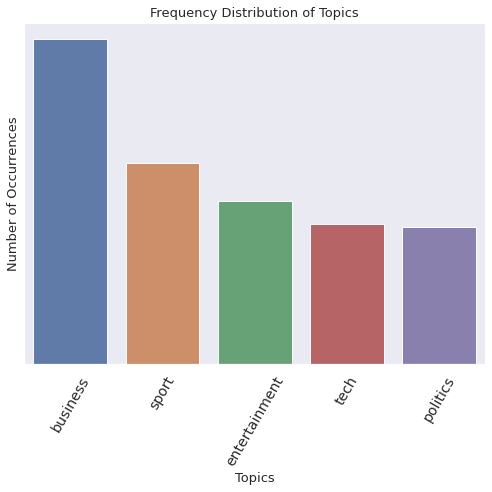

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)

sns.set(style = 'darkgrid')
sns.barplot(x=class_.index , y = class_.values , alpha=0.95)

plt.title('Frequency Distribution of Topics', fontsize=13)
plt.ylabel('Number of Occurrences', fontsize=13)
plt.xlabel('Topics', fontsize=13)

plt.xticks(rotation=60,fontsize = 14)
plt.yticks([])

plt.tight_layout()
plt.show()


In [ ]:
# the details about the source page
source_page_count = data['webpage_source'].value_counts()
top_15_source = source_page_count[:15]
top_15_source

dailymail.co.uk         1512
nasdaq.com              1104
newindianexpress.com     850
yahoo.com                829
indiatimes.com           757
news18.com               617
houstonchronicle.com     572
globenewswire.com        556
hindustantimes.com       525
reuters.com              511
thestreet.com            437
washingtonpost.com       433
cbslocal.com             420
thehindu.com             406
express.co.uk            402
Name: webpage_source, dtype: int64

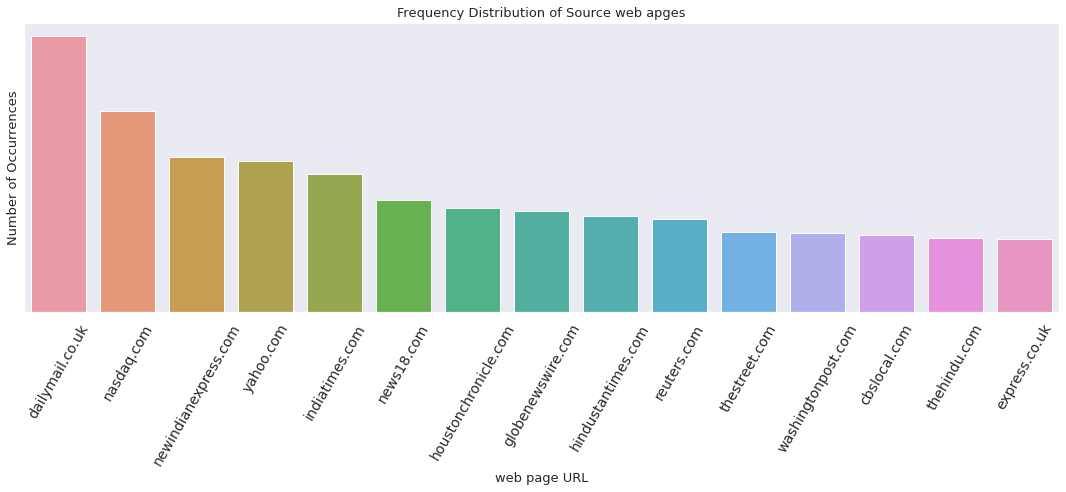

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(15, 7), sharex=True)

sns.set(style = 'darkgrid')
sns.barplot(x=top_15_source.index , y = top_15_source.values , alpha=0.95)

plt.title('Frequency Distribution of Source web apges', fontsize=13)
plt.ylabel('Number of Occurrences', fontsize=13)
plt.xlabel('web page URL', fontsize=13)

plt.xticks(rotation=60,fontsize = 14)
plt.yticks([])

plt.tight_layout()
plt.show()

In [ ]:
# distribution of site names
site_count = data['site_name'].value_counts()
top_15_site_count = site_count[:15]
top_15_site_count

Mail Online                1512
The New Indian Express      850
News18                      605
HoustonChronicle.com        571
GlobeNewswire News Room     556
The Economic Times          532
U.S.                        478
hindustantimes.com          439
Washington Post             433
TheStreet                   426
Express.co.uk               402
CBSSports.com               394
SFChronicle.com             386
thestar.com                 381
The Sun                     373
Name: site_name, dtype: int64

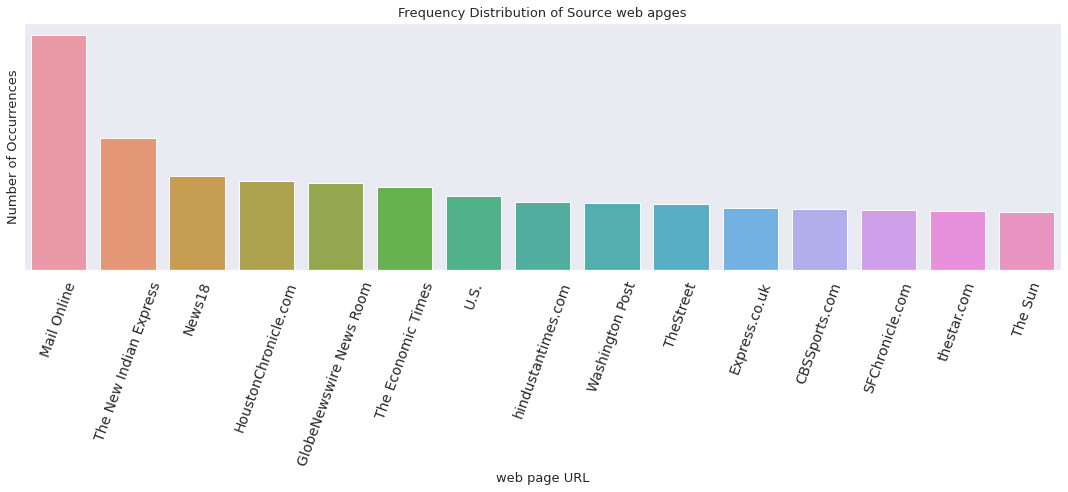

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(15, 7), sharex=True)

sns.set(style = 'darkgrid')
sns.barplot(x=top_15_site_count.index , y = top_15_site_count.values , alpha=0.95)

plt.title('Frequency Distribution of Source web apges', fontsize=13)
plt.ylabel('Number of Occurrences', fontsize=13)
plt.xlabel('web page URL', fontsize=13)

plt.xticks(rotation=70,fontsize = 14)
plt.yticks([])

plt.tight_layout()
plt.show()

# Filter out the Data that only contain author name

In [ ]:
author_null = data['author']=='[]'
print(author_null)
print()

print("The whole dataset size------------>",data.shape)
data = data[~author_null]

print()
print('The Dataset contain author name--->',data.shape)
print()
print("Dataset contain no author name---->",len(author_null)-data.shape[0])

0          True
4         False
6         False
8          True
11        False
          ...  
187782     True
187787     True
187789     True
187791     True
187796     True
Name: author, Length: 36587, dtype: bool

The whole dataset size------------> (36587, 14)

The Dataset contain author name---> (11793, 14)

Dataset contain no author name----> 24794


In [ ]:
# convert the author name json to str
def convert_str(t):
  return json.loads(t)[0]

data['author'] = data.apply(lambda row : convert_str(row['author']) , axis=1)
data.head(4)

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,language
4,"Liz Josaitis, Michigan State University Extension",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,a few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com,en
6,Aja Styles,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,perth mother clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au,en
11,Jake Johnson,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The billâs gifts to the wealthy underscore t...,in late-night votes just hours after nearly 5...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Congress Passes COVID Relief With Billions in ...,politics,https://truthout.org/articles/congress-passes-...,truthout.org,en
12,Christine Favocci,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,It is naive to think that either party is free...,the left has insisted that voter fraud is jus...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,PA Man Facing Charges of Unlawful Voting After...,tech,https://www.westernjournal.com/pa-man-facing-c...,westernjournal.com,en


In [ ]:
# find the null value
null_value = data['author'].isnull().sum()
print("Total number of null values----->",null_value)

Total number of null values-----> 3


In [ ]:
# there are 3 null values so that have to be deleted 
data = data.dropna(subset=['author'])

print("THe final dataset shape------>",data.shape)

THe final dataset shape------> (11790, 14)


# Find the outliers bashed on the author name

In [ ]:
# craate author_exclusion  list that excludes some author names that denote outlets and not persons.
# For example, this list should contain "reuters", 'associated press' etc. 
total_author = len(list(data['author'].unique()))
print("The number of district authors in the dataset----->",total_author)

The number of district authors in the dataset-----> 4690


In [ ]:
#import spacy and load the nlp pretrained model
import spacy
nlp = spacy.load('en_core_web_sm')


In [ ]:
# helper function returns named entity label using the spacy
def find_entity(text):
  doc = nlp(text)
  if doc.ents:
    for ent in doc.ents:
      if ent.label_ == 'PERSON':
        return 'person'
      else:
        return 'outlet'
  else:
    return 'noEntity'
print(find_entity('Pavithra Devi'))
print(find_entity('associated press'))
print(find_entity('reuters'))
print(find_entity('Reuters'))

person
outlet
outlet
outlet


In [ ]:
#finding the outlet author names

data['author_entity'] = data.apply(lambda row : find_entity(row['author']) , axis=1)
data.head()

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,language,author_entity
4,"Liz Josaitis, Michigan State University Extension",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,a few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com,en,person
6,Aja Styles,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,perth mother clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au,en,noEntity
11,Jake Johnson,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The billâs gifts to the wealthy underscore t...,in late-night votes just hours after nearly 5...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Congress Passes COVID Relief With Billions in ...,politics,https://truthout.org/articles/congress-passes-...,truthout.org,en,person
12,Christine Favocci,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,It is naive to think that either party is free...,the left has insisted that voter fraud is jus...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,PA Man Facing Charges of Unlawful Voting After...,tech,https://www.westernjournal.com/pa-man-facing-c...,westernjournal.com,en,person
21,Igor Derysh,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Fox aired segments debunking the claims after ...,fox news and fox business just aired multiple...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Fox News Forced to Debunk Its Own False Voting...,business,https://truthout.org/articles/fox-news-forced-...,truthout.org,en,noEntity


In [ ]:
print(data['author_entity'].unique())
author_count = data['author_entity'].value_counts()
print(author_count)

['person' 'noEntity' 'outlet']
person      5722
noEntity    3265
outlet      2803
Name: author_entity, dtype: int64


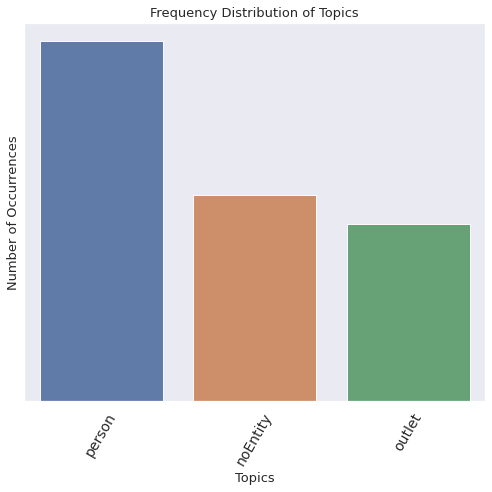

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)

sns.set(style = 'darkgrid')
sns.barplot(x=author_count.index , y = author_count.values , alpha=0.95)

plt.title('Frequency Distribution of Topics', fontsize=13)
plt.ylabel('Number of Occurrences', fontsize=13)
plt.xlabel('Topics', fontsize=13)

plt.xticks(rotation=60,fontsize = 14)
plt.yticks([])

plt.tight_layout()
plt.show()


In [ ]:
# extract the sample which has correct author name and drop the outlets
author_person = data['author_entity'] == 'person'
data_author = data[author_person]
print("The shape of the complete dataset----->",data_author.shape)

The shape of the complete dataset-----> (5722, 15)


In [ ]:
data_author.columns

Index(['author', 'crawl_date', 'crawl_desc', 'crawl_url', 'date',
       'description', 'full_text', 'img_url', 'site_name', 'title', 'topic',
       'url', 'webpage_source', 'language', 'author_entity'],
      dtype='object')

In [ ]:
# total number of authors
print("Total number of authors in the dataset---->",len(list(data_author['author'].unique())))

Total number of authors in the dataset----> 3117


# Final analysis

In [ ]:
# analyze which author publishes where, in what topics, and for top 5 authors,
# which are commonly used keywords they use in titles and/or full text
group_author = data_author.groupby(['author'],sort=True)['title'].count()
group_author.head(5)

author
A. Victoria de Andrés Fernández                  1
AJ Willingham, CNN                               1
AMANDA MCELFRESH | Branded content specialist    1
AMY DKICKINSON Column                            1
ANNA JONES | Staff writer                        1
Name: title, dtype: int64

In [ ]:
top_5 = group_author.nlargest(5)
top_5

author
James Rodger                                      42
Jennifer Blair                                    40
Lauren Corona                                     32
Neil Shaw                                         21
Jake Coyle and Lindsey Bahr | Associated Press    20
Name: title, dtype: int64

In [ ]:
topic_group = data_author.groupby(['topic'])['author'].count()
topic_group

topic
business         1387
entertainment    1182
politics          704
sport            1118
tech             1331
Name: author, dtype: int64

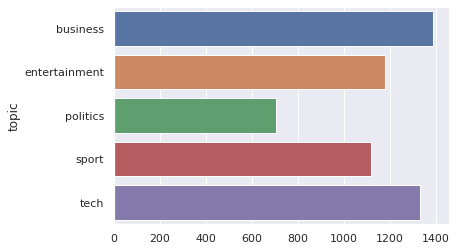

In [ ]:
sns.barplot(x=topic_group.values,y=topic_group.index)

In [ ]:
data_author=data_author.set_index('author')


In [ ]:
top_5_authors_index = list(top_5.index)
top_5_auther_count = list(top_5.values)
print(top_5_authors_index)
top_5_author = data_author.loc[top_5_authors_index,:]
top_5_author.head()

['James Rodger', 'Jennifer Blair', 'Lauren Corona', 'Neil Shaw', 'Jake Coyle and Lindsey Bahr | Associated Press']


,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,language,author_entity
author,,,,,,,,,,,,,,
James Rodger,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223103...,2020-12-23,\n Communities Secretary Robert Jenrick said '...,join the secret elves to discover the best sh...,https://i2-prod.liverpoolecho.co.uk/incoming/a...,BirminghamLive,Every word government has said so far over Tie...,politics,https://www.birminghammail.co.uk/news/midlands...,birminghammail.co.uk,en,person
James Rodger,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223103...,2020-12-23,"\n Tim Spector OBE, lead scientist on the ZOE ...",when you subscribe we will use the informatio...,https://i2-prod.coventrytelegraph.net/incoming...,BirminghamLive,Six coronavirus symptoms experts urge people t...,tech,https://www.birminghammail.co.uk/news/midlands...,birminghammail.co.uk,en,person
James Rodger,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223103...,2020-12-23,\n The 20-year-old showcased her weight loss j...,when you subscribe we will use the informatio...,https://i2-prod.coventrytelegraph.net/incoming...,BirminghamLive,Gogglebox fans left in disbelief after Amy Tap...,sport,https://www.birminghammail.co.uk/news/showbiz-...,birminghammail.co.uk,en,person
James Rodger,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223103...,2020-12-23,\n The yellow weather warning is in effect acr...,join the secret elves to discover the best sh...,https://i2-prod.birminghammail.co.uk/incoming/...,BirminghamLive,Birmingham hit by two day 'danger to life' wea...,tech,https://www.birminghammail.co.uk/news/midlands...,birminghammail.co.uk,en,person
James Rodger,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223060...,2020-12-23,\n The announcement and emergence of a new str...,when you subscribe we will use the informatio...,https://i2-prod.birminghammail.co.uk/incoming/...,BirminghamLive,Tesco now rationing three common household pro...,tech,https://www.birminghammail.co.uk/whats-on/shop...,birminghammail.co.uk,en,person


In [ ]:
data = top_5_author.reset_index()
column = list(data.columns)
print("Columns---->",column)
print()

data.info()

Columns----> ['author', 'crawl_date', 'crawl_desc', 'crawl_url', 'date', 'description', 'full_text', 'img_url', 'site_name', 'title', 'topic', 'url', 'webpage_source', 'language', 'author_entity']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   author          155 non-null    object
 1   crawl_date      155 non-null    object
 2   crawl_desc      155 non-null    object
 3   crawl_url       155 non-null    object
 4   date            155 non-null    object
 5   description     155 non-null    object
 6   full_text       155 non-null    object
 7   img_url         155 non-null    object
 8   site_name       155 non-null    object
 9   title           155 non-null    object
 10  topic           155 non-null    object
 11  url             155 non-null    object
 12  webpage_source  155 non-null    object
 13  language        155 non-null    

In [ ]:
#select the needed columns
col = ['author','full_text','title','topic']
data_top_5_author = data[col]
data_top_5_author = data_top_5_author.set_index('author')
data_top_5_author.head(5)

,full_text,title,topic
author,,,
James Rodger,join the secret elves to discover the best sh...,Every word government has said so far over Tie...,politics
James Rodger,when you subscribe we will use the informatio...,Six coronavirus symptoms experts urge people t...,tech
James Rodger,when you subscribe we will use the informatio...,Gogglebox fans left in disbelief after Amy Tap...,sport
James Rodger,join the secret elves to discover the best sh...,Birmingham hit by two day 'danger to life' wea...,tech
James Rodger,when you subscribe we will use the informatio...,Tesco now rationing three common household pro...,tech


In [ ]:
data_top_5_author.loc['James Rodger','title'][1]

"Six coronavirus symptoms experts urge people to check for - and they aren't on official NHS list - Birmingham Live"

In [ ]:
group_topic_5 = data_top_5_author.groupby(['topic'])['title'].count()
group_topic_5

topic
business          3
entertainment    54
politics         14
sport            18
tech             66
Name: title, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


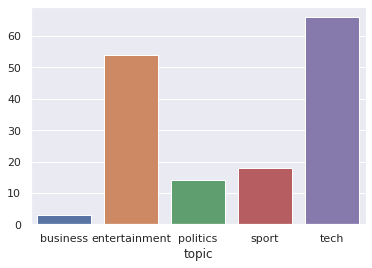

In [ ]:
sns.barplot(group_topic_5.index,group_topic_5.values)

In [ ]:
#finding the most used keyword in the title by the top 5 author
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#import and load spacy for all cleaning 
import spacy
nlp = spacy.load('en_core_web_sm')

#data_top_5_author.shape[0]
def clean_text(author_name,lenth):
  corpus = []
  for index in range(0,lenth):
    text = re.sub('[^a-zA-Z]',' ',data_top_5_author.loc[author_name,'title'][index])
    text = text.split()
    text = [t for t in text if not t in set(stopwords.words('english'))]
    text = ' '.join(text)
    doc = nlp(text)
    for word in doc:
      corpus.append(word.lemma_)
    result = ' '.join(corpus)
  return result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['every', 'word', 'government', 'say', 'far', 'Tier', 'change', 'Boxing', 'Day', 'lockdown', 'Birmingham', 'Live', 'six', 'coronavirus', 'symptom', 'expert', 'urge', 'people', 'check', 'official', 'NHS', 'list', 'Birmingham', 'Live']
['the', 'good', 'acrylic', 'paint', 'set', 'Hartford', 'Courant', 'the', 'good', 'disinfect', 'bathroom', 'cleaner', 'Hartford', 'Courant']
['the', 'good', 'life', 'insurance', 'Hartford', 'Courant', 'the', 'good', 'Christmas', 'family', 'pajama', 'Hartford', 'Courant']
['Odds', 'White', 'Christmas', 'UK', 'city', 'snow', 'begin', 'fall', 'Wales', 'Online', 'Origin', 'New', 'Covid', 'explain', 'scientist', 'see', 'beat', 'vaccine', 'Wales', 'Online']
['first', 'cow', 'Online', 'stltoday', 'com', 'Nomadland', 'Online', 'stltoday', 'com']


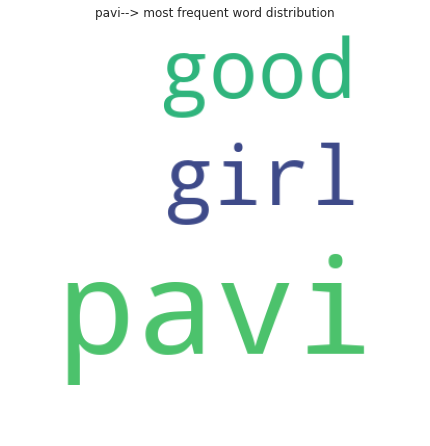

In [ ]:
#plot the frequency distriution of words using the wordcloud
from wordcloud import WordCloud
def word_cloud_plot(author_name,text_list):
  cloud = WordCloud(width = 400, height = 400,background_color = "white", max_words = 5,)
  cloud = cloud.generate(text_list)
  plt.figure(figsize = (6, 6), facecolor = None) 
  plt.title(author_name+'--> most frequent word distribution')
  plt.imshow(cloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
word_cloud_plot('pavi','pavi is the good girl pavi pavi pavi')

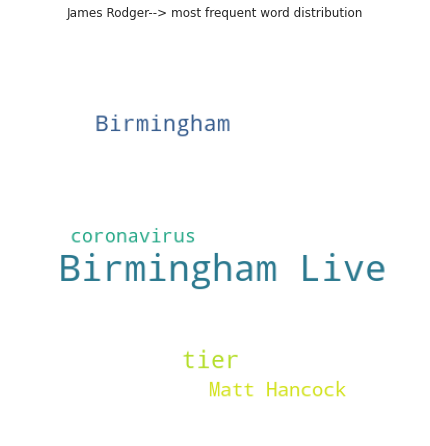

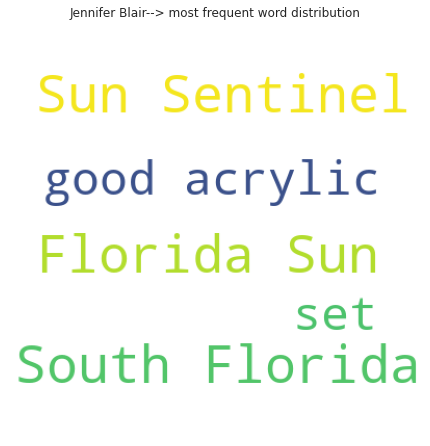

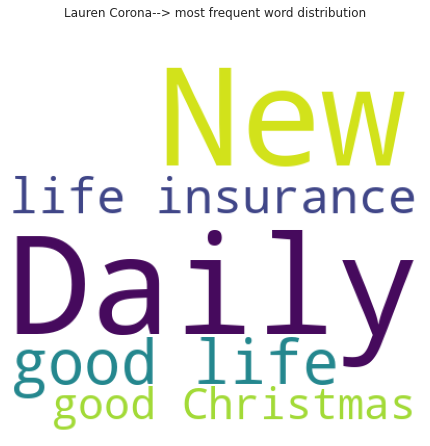

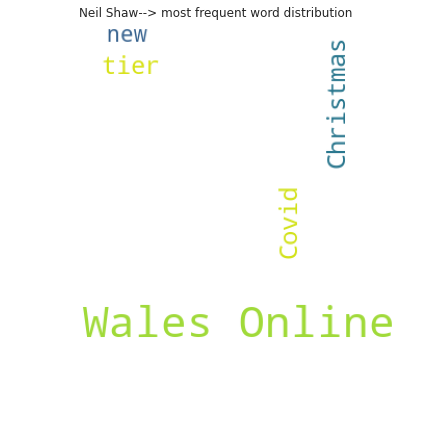

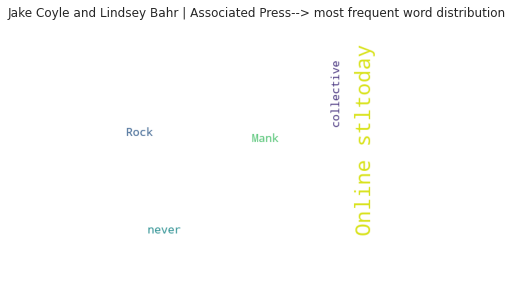

In [ ]:
author_names = top_5_authors_index # already found the names
lenth = top_5_auther_count
for name,l in zip(author_names,lenth):
  corpus = clean_text(name,l)
  word_cloud_plot(name,corpus)
  print()
  print()